In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
l=\
[pd.read_csv("./DataSet/Bus_Stop_sound.csv",header=None).values.flatten(),
pd.read_csv("./DataSet/Congestion_sound.csv",header=None).values.flatten(),
pd.read_csv("./DataSet/Bus_Stop_with_Congestion_sound.csv",header=None).values.flatten()]

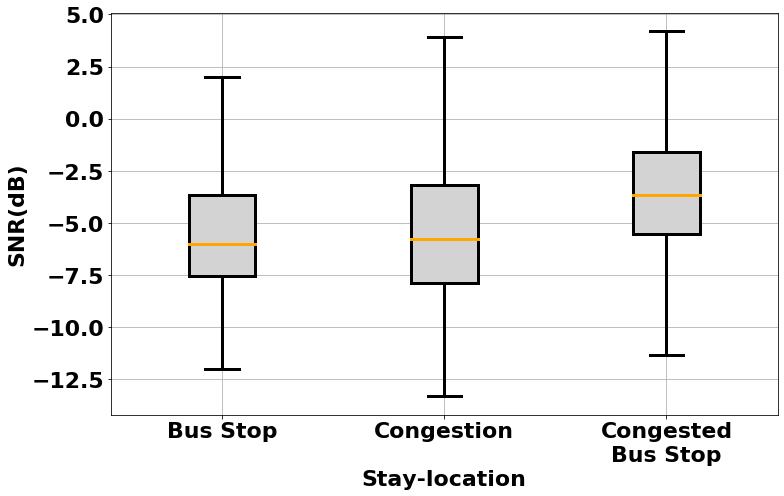

In [3]:
fig, ax = plt.subplots(figsize=(11,7))

pos=[1,2,3]
sep=0.7

bp1=\
ax.boxplot(l,
            positions=pos,
            showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )

ax.set_xlabel("Stay-location",fontsize=22, fontweight='bold')
ax.set_ylabel("SNR(dB)",fontsize=22, fontweight='bold')

ax.set_xticks([1,2,3])
ax.set_xticklabels(['Bus Stop','Congestion','Congested\nBus Stop'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()

In [4]:
fig.savefig('./plots/Sound_snr_Across_PoI_motivation.png')

In [5]:
import scipy.io.wavfile as wavfile

def split_by_second(arr,sr=44100):
    l=[]
    for i in range(0,arr.size,sr):
        if i+sr>arr.size:
            l.append(arr[i:])
        else:
            l.append(arr[i:i+sr])
    return l

def get_peak_to_peak_per_second(data,sr):
    l=list(map(lambda e:np.max(e)-np.min(e),split_by_second(data,sr)))
    return np.array(l)

def get_peak_to_peak_for_file(fname):
    sr,data=wavfile.read(fname)
    #print(data.dtype)
    return get_peak_to_peak_per_second(data,sr)

In [6]:
l=[ get_peak_to_peak_for_file('./DataSet/sound/Bus Stop Sound.wav'),
    get_peak_to_peak_for_file('./DataSet/sound/Congession.wav'),
    get_peak_to_peak_for_file('./DataSet/sound/Bus Stop with Congession.wav')]

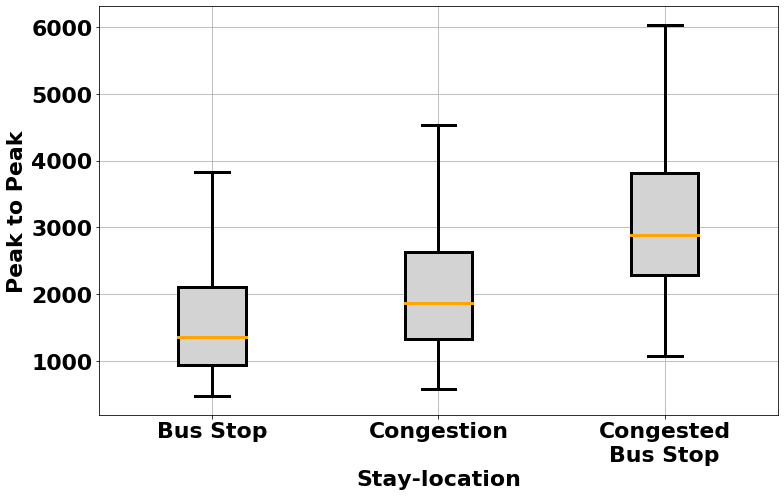

In [7]:
fig, ax = plt.subplots(figsize=(11,7))

pos=[1,2,3]
sep=0.7

bp1=\
ax.boxplot(l,
            positions=pos,
            showfliers=False,notch=False,patch_artist=True, boxprops=dict(linewidth=3.0,color='black',facecolor="lightgrey"),
            whiskerprops = dict(linestyle='-',linewidth=3.0, color='black'),
            capprops=dict(linestyle='-',linewidth=3.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=3.0, color='orange')
          )

ax.set_xlabel("Stay-location",fontsize=22, fontweight='bold')
ax.set_ylabel("Peak to Peak",fontsize=22, fontweight='bold')

ax.set_xticks([1,2,3])
ax.set_xticklabels(['Bus Stop','Congestion','Congested\nBus Stop'],fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.grid()

In [8]:
fig.savefig('./plots/Sound_pk2pk_Across_PoI_motivation.png')

In [9]:
#NICE